In [18]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import cm
import matplotlib
import pandas as pd
import seaborn as sns
from scipy.stats import gaussian_kde
import glob

plt.rc('font', family='serif')
plt.rc('text.latex', preamble=r'\usepackage{amsmath,bm}')
matplotlib.rcParams.update({'font.size': 20})

# colorblind colors
colors = ['#377eb8', '#ff7f00', '#4daf4a',
                  '#f781bf', '#a65628', '#984ea3',
                  '#999999', '#e41a1c', '#dede00']
markers = ['s','o','^','x']
linestyles=['-','--','-.']

# matplotlib.use('TkAgg')

In [19]:
filelist = [
    "../min_energy_loss/data_phase_one_tmax_0.01_SAA_sweep_resolved_surf_0.25/data_opt_nfp4_phase_one_aspect_7.0_iota_0.89_mean_energy_SAA_surface_0.25_tmax_0.01_bobyqa_mmode_3_iota_None.pickle"
    ,"../min_energy_loss/data_phase_one_tmax_0.01_SAA_sweep_resolved_surf_full/data_opt_nfp4_phase_one_aspect_7.0_iota_-1.043_mean_energy_SAA_surface_full_tmax_0.01_bobyqa_mmode_3_iota_None.pickle"
]

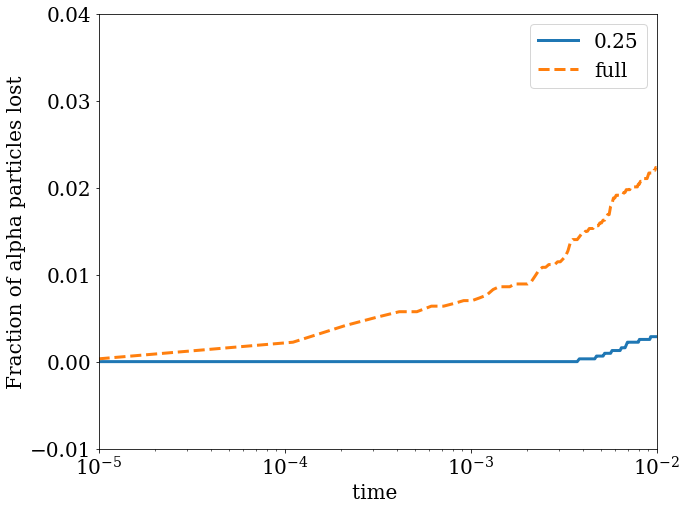

In [24]:
# loss profile
fig,ax = plt.subplots(nrows=1,ncols=1,figsize = (10,8))

for ii,infile in enumerate(filelist):

    # load the data
    indata = pickle.load(open(infile,"rb"))
    # load all of the data
    for key in list(indata.keys()):
        s  = f"{key} = indata['{key}']"
        exec(s)
#     # show the keys
#     list(indata.keys())

    # make the loss profile
    times = np.linspace(1e-5,tmax,100)
    
    # in-sample loss
#     loss_profile = np.array([np.mean(c_times_opt< t) for t in times]) 
#     plt.plot(times,loss_profile,linewidth=3,label='in-sample')

    # out-of-sample loss
    loss_profile = np.array([np.mean(c_times_out_of_sample< t) for t in times]) 
    plt.plot(times,loss_profile,linewidth=3,linestyle=linestyles[ii],label=sampling_level)

plt.xlabel('time ')
plt.ylabel("Fraction of alpha particles lost")
plt.xscale('log')
bottom,top =plt.ylim(-0.01,0.04)
# plt.vlines(tmax,bottom,top,linestyle='--',color='k',linewidth=2)
plt.xlim(1e-5,tmax)
plt.legend()
plt.show()
